In [12]:
from google.colab import files
uploaded = files.upload()

Saving payroll_jobs_table1.xlsx to payroll_jobs_table1 (1).xlsx


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

**STEP 1: Load the data with the correct header**

In [14]:
file_path = 'payroll_jobs_table1.xlsx'
df = pd.read_excel(file_path, sheet_name='Table 1', header=5)

In [15]:
xls = pd.ExcelFile('payroll_jobs_table1.xlsx')
print(xls.sheet_names)

['Contents', 'Table 1']


In [16]:
print("Step 1: Raw Data Preview")
df.head()

Step 1: Raw Data Preview


,State or Territory,Industry division,Age group,2020-01-04 00:00:00,2020-01-11 00:00:00,2020-01-18 00:00:00,2020-01-25 00:00:00,2020-02-01 00:00:00,2020-02-08 00:00:00,2020-02-15 00:00:00,...,2024-10-12 00:00:00,2024-10-19 00:00:00,2024-10-26 00:00:00,2024-11-02 00:00:00,2024-11-09 00:00:00,2024-11-16 00:00:00,2024-11-23 00:00:00,2024-11-30 00:00:00,2024-12-07 00:00:00,2024-12-14 00:00:00
0,0. Australia,0. All industries,0. All ages,92.70,95.16,96.69,97.52,98.05,98.68,99.19,...,117.41,117.84,118.16,118.27,118.42,118.61,118.66,118.79,118.70,118.39
1,0. Australia,0. All industries,1. 15-19,92.27,94.93,97.12,98.91,98.50,100.03,101.14,...,123.38,123.95,124.92,122.94,124.97,126.67,127.46,129.04,128.63,129.72
2,0. Australia,0. All industries,2. 20-29,92.45,95.27,97.24,98.05,98.18,98.64,99.26,...,115.37,116.07,116.14,115.89,116.11,116.36,116.47,116.84,116.43,116.06
3,0. Australia,0. All industries,3. 30-39,93.26,95.64,97.01,97.68,98.18,98.67,99.18,...,117.56,117.87,118.10,118.19,118.24,118.34,118.27,118.30,118.19,117.88
4,0. Australia,0. All industries,4. 40-49,93.01,95.26,96.58,97.36,98.02,98.69,99.14,...,115.66,116.05,116.38,116.68,116.71,116.78,116.74,116.67,116.63,116.24


**STEP 2: Reshape from wide to long format**

In [17]:
df_long = df.melt(
    id_vars=['State or Territory', 'Industry division', 'Age group'],
    var_name='Week ending',
    value_name='Payroll jobs index'
)

In [18]:
# Convert Week ending to datetime
df_long['Week ending'] = pd.to_datetime(df_long['Week ending'])

In [20]:
print("Step 2: Reshaped Data Preview")
df_long.head()

Step 2: Reshaped Data Preview


,State or Territory,Industry division,Age group,Week ending,Payroll jobs index
0,0. Australia,0. All industries,0. All ages,2020-01-04,92.70
1,0. Australia,0. All industries,1. 15-19,2020-01-04,92.27
2,0. Australia,0. All industries,2. 20-29,2020-01-04,92.45
3,0. Australia,0. All industries,3. 30-39,2020-01-04,93.26
4,0. Australia,0. All industries,4. 40-49,2020-01-04,93.01


**STEP 3: Filter by date range**

In [24]:
start_date = '2020-03-01'
end_date = '2021-06-30'

In [25]:
# Apply date filter
df_filtered = df_long[
    (df_long['Week ending'] >= start_date) &
    (df_long['Week ending'] <= end_date)
]

In [26]:
print("Step 3: Date-Filtered Data Preview")
df_filtered.head()

Step 3: Date-Filtered Data Preview


,State or Territory,Industry division,Age group,Week ending,Payroll jobs index
12978,0. Australia,0. All industries,0. All ages,2020-03-07,99.88
12979,0. Australia,0. All industries,1. 15-19,2020-03-07,99.61
12980,0. Australia,0. All industries,2. 20-29,2020-03-07,99.99
12981,0. Australia,0. All industries,3. 30-39,2020-03-07,99.87
12982,0. Australia,0. All industries,4. 40-49,2020-03-07,99.82


**STEP 4: Filter & Visualise Industry Trends**

In [37]:
selected_industries = [
    '08. H-Accommodation & food services',
    '09. I-Transport, postal & warehousing',
    '06. F-Wholesale trade',
    '12. L-Rental, hiring & real estate services',
    '16. P-Education & training'
]

In [38]:
# Filter the data
df_industry = df_filtered[df_filtered['Industry division'].isin(selected_industries)]

In [39]:
print("Filtered industries data:")
df_industry.head()

Filtered industries data:


,State or Territory,Industry division,Age group,Week ending,Payroll jobs index
13026,0. Australia,06. F-Wholesale trade,0. All ages,2020-03-07,99.59
13027,0. Australia,06. F-Wholesale trade,1. 15-19,2020-03-07,98.88
13028,0. Australia,06. F-Wholesale trade,2. 20-29,2020-03-07,99.67
13029,0. Australia,06. F-Wholesale trade,3. 30-39,2020-03-07,99.52
13030,0. Australia,06. F-Wholesale trade,4. 40-49,2020-03-07,99.58


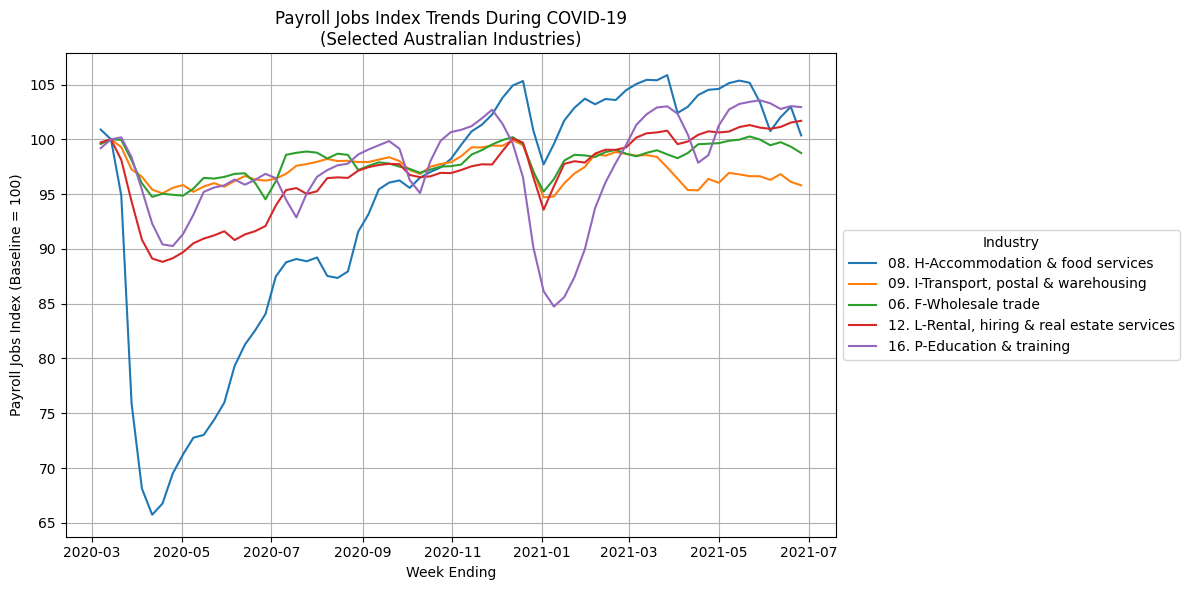

In [47]:
# Visualise industry trends using line plot

# Filter only national and all-age data for clear comparison
df_plot = df_industry[
    (df_industry['State or Territory'] == '0. Australia') &
    (df_industry['Age group'] == '0. All ages')
]

# Initialise the plot
plt.figure(figsize=(12, 6))

# Plot each industry
for industry in selected_industries:
    subset = df_plot[df_plot['Industry division'] == industry]
    plt.plot(subset['Week ending'], subset['Payroll jobs index'], label=industry)

# Formatting
plt.title("Payroll Jobs Index Trends During COVID-19\n(Selected Australian Industries)")
plt.xlabel("Week Ending")
plt.ylabel("Payroll Jobs Index (Baseline = 100)")
plt.legend(title='Industry', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

**STEP 5: Compute percentage change for each industry**

In [56]:
# Compare pre- vs post-COVID trends
# Define pre-COVID and during-COVID date ranges
baseline_period = (df_plot['Week ending'] >= '2020-03-07') & (df_plot['Week ending'] < '2020-03-28')
covid_period = (df_plot['Week ending'] > '2020-03-28') & (df_plot['Week ending'] <= '2021-06-26')

# Group by industry and calculate average Payroll Jobs Index for each period
baseline_avg = df_plot[baseline_period].groupby('Industry division')['Payroll jobs index'].mean()
covid_avg = df_plot[covid_period].groupby('Industry division')['Payroll jobs index'].mean()

In [57]:
# Combine into a DataFrame
impact_df = pd.DataFrame({
    'Pre-COVID Avg': baseline_avg,
    'COVID Avg': covid_avg
})

In [58]:
# Calculate percentage change
impact_df['% Change'] = ((impact_df['COVID Avg'] - impact_df['Pre-COVID Avg']) / impact_df['Pre-COVID Avg']) * 100

# Filter to selected industries
impact_df = impact_df.loc[selected_industries]

# Round values
impact_df = impact_df.round(2)

# Display result
impact_df.reset_index(inplace=True)
impact_df

,Industry division,Pre-COVID Avg,COVID Avg,% Change
0,08. H-Accommodation & food services,98.59,94.35,-4.30
1,"09. I-Transport, postal & warehousing",99.63,97.17,-2.46
2,06. F-Wholesale trade,99.85,97.96,-1.89
3,"12. L-Rental, hiring & real estate services",99.28,96.79,-2.51
4,16. P-Education & training,99.79,97.37,-2.42


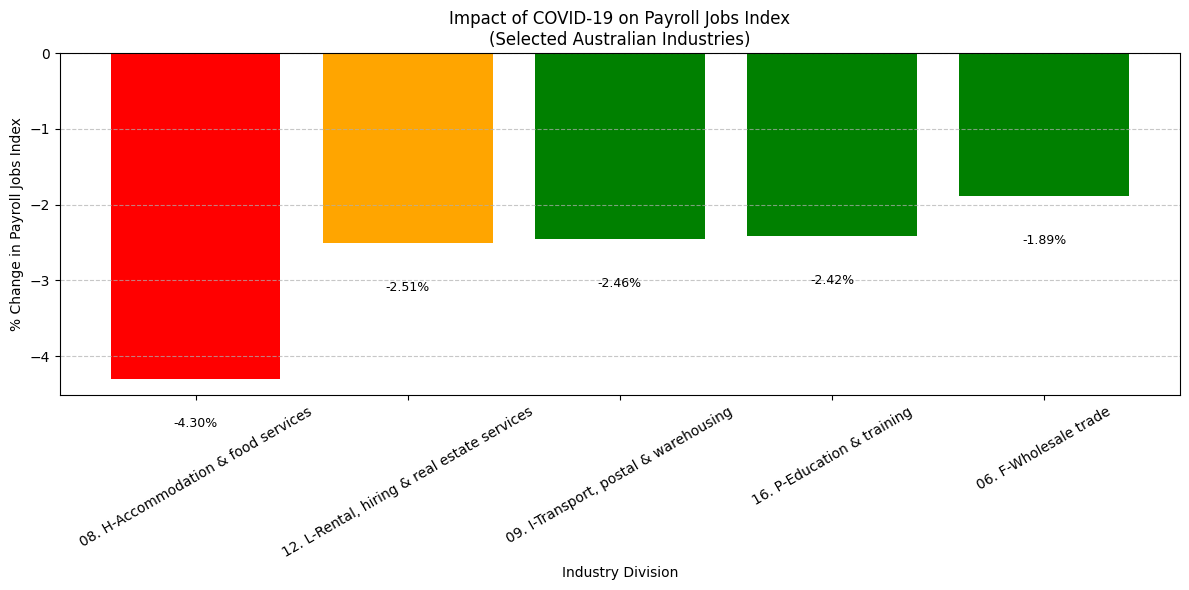

In [65]:
# Sort the DataFrame by % Change
impact_df_sorted = impact_df.sort_values(by='% Change')

# Defind colours based on severity
colors = ['red' if x <= -4 else 'orange' if x <= -2.5 else 'green' for x in impact_df_sorted['% Change']]

# Plot using a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(
    impact_df_sorted['Industry division'],
    impact_df_sorted['% Change'],
    color=colors
)

# Add percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.5, f"{yval:.2f}%",
             ha='center', va='top', fontsize=9, color='black')

# Labels and layout
plt.title("Impact of COVID-19 on Payroll Jobs Index\n(Selected Australian Industries)")
plt.xlabel("Industry Division")
plt.ylabel("% Change in Payroll Jobs Index")
plt.xticks(rotation=30, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**STEP 5: Analyse Impact**

### A. Observations from the Bar Chart

| Industry                                 | % Change | Key Observation |
|------------------------------------------|----------|------------------|
| **08. H-Accommodation & food services**            | **-4.30%** | Sharpest decline; hit hardest due to lockdowns and travel restrictions. |
| **12. L-Rental, hiring & real estate services**    | -2.51%   | Decline likely due to economic slowdown and decreased mobility. |
| **09. I-Transport, postal & warehousing**          | -2.46%   | Affected by reduced logistics demand during early lockdown. |
| **16. P-Education & training**                     | -2.42%   | Schools and universities were partially closed. |
| **06. F-Wholesale trade**                          | -1.89%   | Least impacted; essential supply chains stayed active. |


B. Line Chart + Timeline Markers

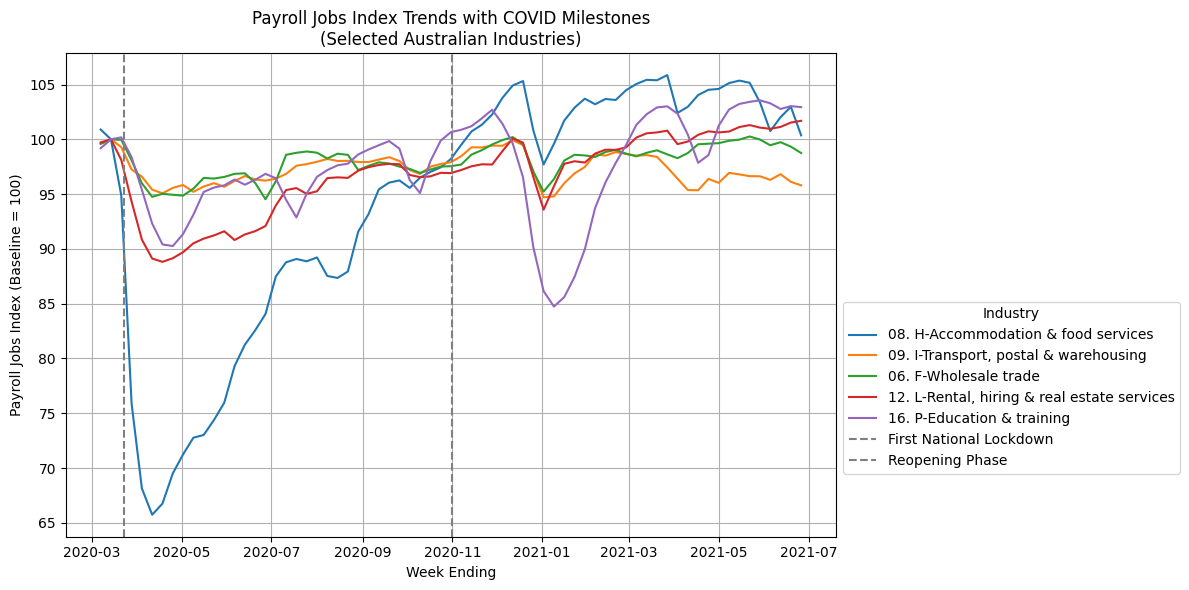

In [66]:
# Add key lockdown dates to existing line plot
plt.figure(figsize=(12,6))

for industry in selected_industries:
    subset = df_plot[df_plot['Industry division'] == industry]
    plt.plot(subset['Week ending'], subset['Payroll jobs index'], label=industry)

# Annotate key COVID events
plt.axvline(pd.to_datetime('2020-03-23'), color='gray', linestyle='--', label='First National Lockdown')
plt.axvline(pd.to_datetime('2020-11-01'), color='gray', linestyle='--', label='Reopening Phase')

# Final touches
plt.title("Payroll Jobs Index Trends with COVID Milestones\n(Selected Australian Industries)")
plt.xlabel("Week Ending")
plt.ylabel("Payroll Jobs Index (Baseline = 100)")
plt.legend(title='Industry', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

C. Written Summary

During the COVID-19 pandemic, Australia's job market experienced significant fluctuations across industries.

*   **Accommodation & food services** faced the largest drop in job activity (–4.3%), reflecting early and prolonged shutdowns of hospitality and tourism.
*   **Transport and warehousing** declined due to reduced mobility and freight restrictions.
*   **Education and training** also dropped as schools transitioned to remote learning.
*   Meanwhile, **wholesale trade** remained relatively stable, indicating its essential role in the supply chain during the crisis.

These trends strongly correlate with national lockdowns and policy restrictions — particularly the **first wave in March 2020** and **subsequent state-based lockdowns in mid to late 2020**.

## 📊 Summary of Findings: COVID-19 Impact on Australian Payroll Jobs

This analysis explored the impact of COVID-19 on payroll jobs across selected Australian industries from early 2020 to mid-2021.

### 🔍 Key Insights:

- **Accommodation & Food Services** experienced the **steepest decline (-4.30%)**, mainly due to border closures, travel restrictions, and lockdowns.
- **Transport, Postal & Warehousing** and **Rental, Hiring & Real Estate** both saw around **2.5% drops**, likely tied to reduced economic activity and lower physical mobility.
- **Education & Training** also declined **(-2.42%)**, reflecting temporary school/university closures.
- **Wholesale Trade** was the **least affected** (**-1.89%**) — essential supply chains remained operational.

### 📅 Timeline:

- **Pre-COVID Baseline:** March 2020 to early April 2020  
- **COVID Impact Period:** April 2020 to June 2021  
These periods reflect the first wave of nationwide lockdowns and the gradual reopening phases.

---

### ✅ Data Scope:
- **Geography:** Australia (National)
- **Age Group:** All ages
- **Segments:** 5 Industry divisions
- **Source:** ABS Weekly Payroll Jobs and Wages in Australia
